**Abstract**

Heart disease refers to any condition affecting the cardiovascular system. There are several different types of heart disease, and they affect the heart and blood vessels in different ways.

Number of instances: 302
Number of attributes: 14 continuous attributes

In [1]:
# Importing the necessary componets
import pandas as pd
import openpyxl

In [2]:
# Reading in the data
HDNames= ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','hal','HeartDisease']
Data = pd.read_excel('Ch3.ClevelandData.xlsx', names=HDNames)

In [3]:
# Printing information about the dataset, including a summary oof attributes
print(Data.head(20))
print(Data.info())
summary = Data.describe()
print(summary)

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    67    1   4       160   286    0        2      108      1      1.5   
1    67    1   4       120   229    0        2      129      1      2.6   
2    37    1   3       130   250    0        0      187      0      3.5   
3    41    0   2       130   204    0        2      172      0      1.4   
4    56    1   2       120   236    0        0      178      0      0.8   
5    62    0   4       140   268    0        2      160      0      3.6   
6    57    0   4       120   354    0        0      163      1      0.6   
7    63    1   4       130   254    0        2      147      0      1.4   
8    53    1   4       140   203    1        2      155      1      3.1   
9    57    1   4       140   192    0        0      148      0      0.4   
10   56    0   2       140   294    0        2      153      0      1.3   
11   56    1   3       130   256    1        2      142      1      0.6   
12   44    1   2       12

In [4]:
# Checking for missing/null values
Data.isnull().sum()

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
hal             0
HeartDisease    0
dtype: int64

In [5]:
# Marking missing/null values regardless as a precaution
import numpy as np
DataNew = Data.replace('?', np.nan)

In [6]:
# Checking information about the fixed dataset
print(DataNew.info())
print(DataNew.describe())
print(DataNew.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           302 non-null    int64  
 1   sex           302 non-null    int64  
 2   cp            302 non-null    int64  
 3   trestbps      302 non-null    int64  
 4   chol          302 non-null    int64  
 5   fbs           302 non-null    int64  
 6   restecg       302 non-null    int64  
 7   thalach       302 non-null    int64  
 8   exang         302 non-null    int64  
 9   oldpeak       302 non-null    float64
 10  slope         302 non-null    int64  
 11  ca            298 non-null    float64
 12  hal           300 non-null    float64
 13  HeartDisease  302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  30

In [7]:
# Dropping rows with null values
DataNew = DataNew.dropna()

In [8]:
# Rechecking information about the dataset after changes
print(DataNew.info())
print(DataNew.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 300
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   trestbps      296 non-null    int64  
 4   chol          296 non-null    int64  
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slope         296 non-null    int64  
 11  ca            296 non-null    float64
 12  hal           296 non-null    float64
 13  HeartDisease  296 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.7 KB
None
age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang 

In [9]:
# Seperating the independent and dependent variables
x=DataNew.drop(["HeartDisease"],axis=1)
y=DataNew["HeartDisease"]

In [10]:
# Checking the label imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print(Counter(y))

Counter({0: 159, 1: 137})


In [11]:
# Balancing the imbalanced labels using oversampling to preserve data
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(x, y)

# Checking for label imbalance
print(Counter(y_ros))

Counter({1: 159, 0: 159})


In [12]:
# Creating a scaler to later scale input data to bring features that are in different ranges to the same range, so machine learning can be performed
# The fit method computes the mean and standard deviation for scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit(X_ros))

MinMaxScaler()


In [13]:
# Scaling the dataset
InputScaled = scaler.fit_transform(X_ros)

# Creating a dataframe of the scaled dataset
InputScaled = pd.DataFrame(InputScaled,columns=X_ros.columns)

# Checking the summary of the transposed (changing the row elements into column elements and vice versa), scaled data
summary = InputScaled.describe()
summary = summary.transpose()
print(summary)

          count      mean       std  min       25%       50%       75%  max
age       318.0  0.538129  0.187346  0.0  0.395833  0.562500  0.666667  1.0
sex       318.0  0.688679  0.463763  0.0  0.000000  1.000000  1.000000  1.0
cp        318.0  0.728512  0.317750  0.0  0.666667  0.666667  1.000000  1.0
trestbps  318.0  0.361131  0.175893  0.0  0.245283  0.339623  0.433962  1.0
chol      318.0  0.280556  0.120281  0.0  0.196347  0.269406  0.353881  1.0
fbs       318.0  0.147799  0.355460  0.0  0.000000  0.000000  0.000000  1.0
restecg   318.0  0.512579  0.497469  0.0  0.000000  1.000000  1.000000  1.0
thalach   318.0  0.593980  0.176711  0.0  0.467557  0.618321  0.717557  1.0
exang     318.0  0.330189  0.471022  0.0  0.000000  0.000000  1.000000  1.0
oldpeak   318.0  0.176709  0.190724  0.0  0.000000  0.129032  0.290323  1.0
slope     318.0  0.308176  0.306598  0.0  0.000000  0.500000  0.500000  1.0
ca        318.0  0.236897  0.319582  0.0  0.000000  0.000000  0.333333  1.0
hal       31

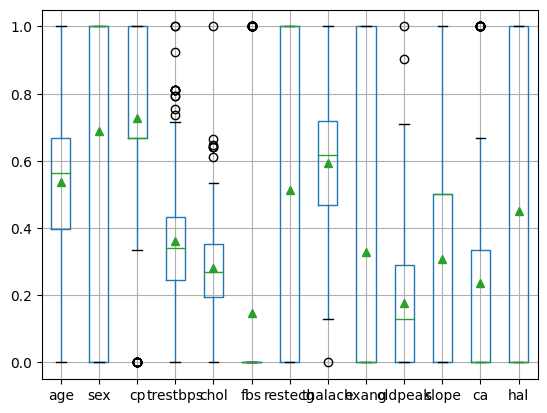

In [14]:
# Checking for outliers in the scaled data using boxplots
import matplotlib.pyplot as plt
boxplot = InputScaled.boxplot(column=list(X_ros.columns),showmeans=True)
plt.show()

In [15]:
# Finding correlations. The indpendent variables should be highly correlated with the dependent variables. Numbers closer to 0 indicate weaker correlation.
CorData = InputScaled.corr(method='pearson')
with pd.option_context('display.max_rows', None, 'display.max_columns', CorData.shape[1]):
    print(CorData)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.080037  0.115191  0.297785  0.212521  0.135184   
sex      -0.080037  1.000000  0.009761 -0.076721 -0.211297  0.031232   
cp        0.115191  0.009761  1.000000 -0.029377  0.076060 -0.025324   
trestbps  0.297785 -0.076721 -0.029377  1.000000  0.142151  0.233161   
chol      0.212521 -0.211297  0.076060  0.142151  1.000000  0.011702   
fbs       0.135184  0.031232 -0.025324  0.233161  0.011702  1.000000   
restecg   0.180295  0.030701  0.061586  0.176987  0.181929  0.087571   
thalach  -0.385363 -0.077185 -0.341786 -0.068683 -0.004834 -0.039921   
exang     0.107118  0.139916  0.368984  0.093255  0.071726  0.046748   
oldpeak   0.209075  0.071123  0.225173  0.220248  0.090152  0.018064   
slope     0.174074  0.022395  0.165331  0.166146  0.023905  0.072819   
ca        0.360175  0.066397  0.262567  0.108488  0.156280  0.135122   
hal       0.136398  0.361071  0.271326  0.175620  0.039372  0.08

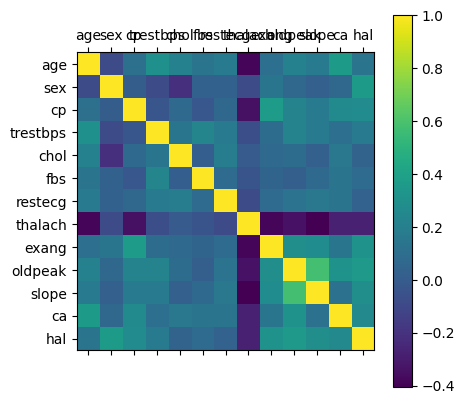

In [16]:
# Plotting a heatmap of correlations to make correlations easier to visualize ana analyze
plt.matshow(CorData)
plt.xticks(range(len(CorData.columns)), CorData.columns)
plt.yticks(range(len(CorData.columns)), CorData.columns)
plt.colorbar()
plt.show()

In [17]:
# Splitting the data into a training dataset and testing dataset where 20% of the dataset is used for testing and 80% of the dataset is used for training
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(InputScaled, y_ros, test_size = 0.2, random_state = 5)
# Checking the size of the training and testing dataset
print(x_train.shape)
print(x_test.shape)

# Checking the size of the targets (results of classification) for training and testing
print(y_train.shape)
print(y_test.shape)

(254, 13)
(64, 13)
(254,)
(64,)


In [18]:
# Using a sequential model with dense and dropout layers
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Creating a sequential model and adding/stacking dense layers  (where the dense layers have 1 input tensor and one output tensor)
model = Sequential()
# Creating a dense input layer with a depth of 15 and the number of neurons equal to the number of attributes fed into the model
model.add(Dense(15, input_shape = (x_train.shape[1],), activation = 'relu'))
# Adding a dropout layer with a frequency of rate of 0.2 (carries 80% of the neurons to the next layer)
model.add(Dropout(0.2))
# Adding a rectified linear activation function to output the input directly if it is positive or output zero
# This layer has a depth of 15
model.add(Dense(15, activation = 'relu'))
# Adding a dropout layer with a frequency of rate of 0.4 (carries 60% of the neurons to the next layer)
model.add(Dropout(0.4))
# Creating a final layer with a depth of 1 and an activation of sigmoid since detection of Chronic Kidney Disease is a binary classification problem
model.add(Dense(1, activation = 'sigmoid'))

# Configuring and training the model on 1000 epochs (generations) using the Adam optimizer variant of stochastic gradient descent
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=800, verbose=1)

8/8 [==============================] - 0s 938us/step - loss: 0.2406 - accuracy: 0.9134
Epoch 302/800
8/8 [==============================] - 0s 940us/step - loss: 0.2717 - accuracy: 0.8937
Epoch 303/800
8/8 [==============================] - 0s 917us/step - loss: 0.2301 - accuracy: 0.9094
Epoch 304/800
8/8 [==============================] - 0s 982us/step - loss: 0.2821 - accuracy: 0.8937
Epoch 305/800
8/8 [==============================] - 0s 960us/step - loss: 0.2931 - accuracy: 0.8858
Epoch 306/800
8/8 [==============================] - 0s 934us/step - loss: 0.2556 - accuracy: 0.8780
Epoch 307/800
8/8 [==============================] - 0s 911us/step - loss: 0.2540 - accuracy: 0.8898
Epoch 308/800
8/8 [==============================] - 0s 941us/step - loss: 0.3027 - accuracy: 0.8819
Epoch 309/800
8/8 [==============================] - 0s 958us/step - loss: 0.2790 - accuracy: 0.8622
Epoch 310/800
8/8 [==============================] - 0s 928us/step - loss: 0.2979 - accuracy: 0.8819
Epoc

In [19]:
# Generating a model summary that states the layer type, the output shape for the layer, and the  number of paramaters being trained in the layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                210       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 466
Trainable params: 466
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Generating the history of the training of the model that trains with training data then tests with the validation data in each epoch, giving the accuracy values 
# Checking for overfitting by making sure the validation accuracy is not decreasing as the accuracy is increasing
history = model.fit(x_train,y_train,validation_data = (x_test, y_test),epochs = 10,verbose = 1)   

Epoch 1/10
8/8 [==============================] - 0s 29ms/step - loss: 0.1977 - accuracy: 0.9370 - val_loss: 1.1683 - val_accuracy: 0.8750
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1902 - accuracy: 0.9331 - val_loss: 1.1763 - val_accuracy: 0.8750
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1845 - accuracy: 0.9252 - val_loss: 1.1765 - val_accuracy: 0.8594
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1994 - accuracy: 0.9173 - val_loss: 1.1795 - val_accuracy: 0.8750
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1871 - accuracy: 0.9291 - val_loss: 1.1838 - val_accuracy: 0.8750
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1762 - accuracy: 0.9213 - val_loss: 1.1832 - val_accuracy: 0.8750
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2223 - accuracy: 0.9291 - val_loss: 1.1863 - val_accuracy: 0.8750
Epoch 8/10
8/8 [=================

In [21]:
# Evaluating the accuracy of the model
score = model.evaluate(x_test, y_test, verbose = 0)
print('Sequential Model Acccuracy= ',score[1])

Sequential Model Acccuracy=  0.890625


In [22]:
Target_Classifcation = model.predict(x_test)
Target_Classifcation  = (Target_Classifcation >0.5)

2/2 [==============================] - 0s 2ms/step


In [23]:
# Creating a confusion matrix to check how many true positives (top left), false positives (top right), false negatives (bottom left), and true negatives (bottom right) the model produced
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Target_Classifcation))

[[31  4]
 [ 3 26]]


In [24]:
# Importing the necessary components to create an ROC Curve and Precision/Recall Curve
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score, plot_precision_recall_curve, f1_score, confusion_matrix


# Creating a function to plot the ROC Curve to check the true positive to false negative rate and make sure the model is appropriate
def plot_auc(t_y, p_y):
    # fpr = False Positive Rate, tpr = True Positive Rate
    fpr, tpr, thresholds = roc_curve(t_y, p_y, pos_label=1)
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % ('classification', auc(fpr, tpr)))
    c_ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    c_ax.legend()
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')

# Creating a function to plot the Precision/Recall Curve Precision, recall, and thresholds are used.
def plot_precision_recall_curve_helper(t_y, p_y):
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    precision, recall, thresholds = precision_recall_curve(t_y, p_y, pos_label=1)
    aps = average_precision_score(t_y, p_y)
    c_ax.plot(recall, precision, label = '%s (AP Score:%0.2f)'  % ('classification', aps))
    c_ax.plot(recall, precision, color='red', lw=2)
    c_ax.legend()
    c_ax.set_xlabel('Recall')
    c_ax.set_ylabel('Precision')
    

In [25]:
# Finding the threshold to optimize the model's performance 
# Using the threshold to make binary classification
# Calculating the F1 Score (a measure of the model's accuracy)
def calc_f1(prec,recall):
    # Using "if recall and prec else 0" to ensure division by 0 doesn't lead to an error
    return 2*(prec*recall)/(prec+recall) if recall and prec else 0

precision, recall, thresholds = precision_recall_curve(y_test, model.predict(x_test, verbose = True))
# Using a list comprehension to call F1 Score calculation function above while looping through the threshold list, which contains the probability that precision and recall aren't in sync anymore
f1score = [calc_f1(precision[i],recall[i]) for i in range(len(thresholds))]
# Finding the argmax (the index of the value that maximizes the F1 Score)
index_max = np.argmax(f1score)
# Finding the threshold of the index that maximizes the F1 Score
threshold = thresholds[index_max]
print(threshold)
# Printing the precision, recall, threshold, and F1 Score of the index that maximizes the F1 Score
print('Precision: '+ str(precision[index_max]))
print('Recall: '+ str(recall[index_max]))
print('Threshold: '+ str(thresholds[index_max]))
print('F1 Score: ' + str(f1score[index_max]))

2/2 [==============================] - 0s 2ms/step
0.5532681
Precision: 0.8666666666666667
Recall: 0.896551724137931
Threshold: 0.5532681
F1 Score: 0.8813559322033899


2/2 [==============================] - 0s 2ms/step


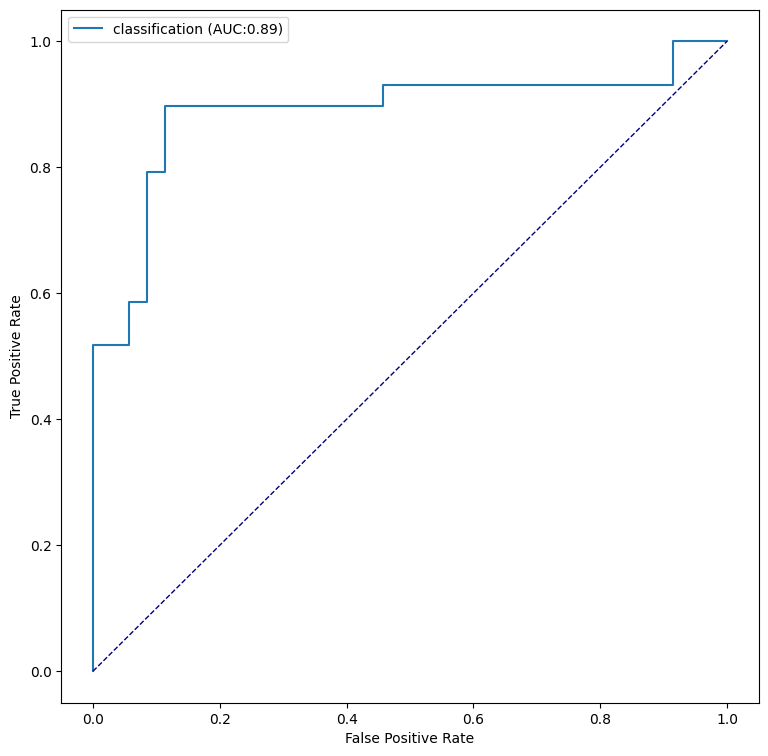

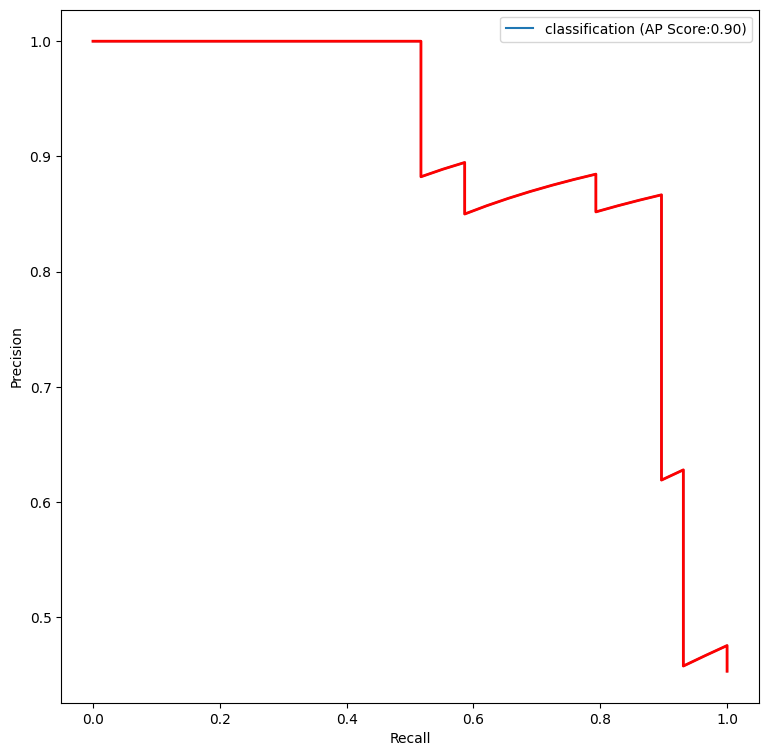

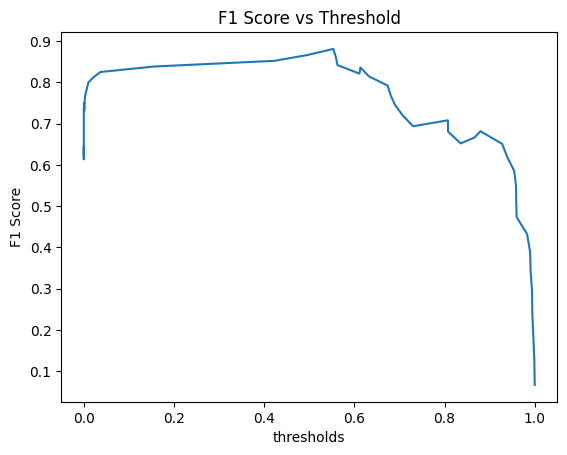

In [26]:
# Creating an ROC Curve using the ROC curve-generating function
# The closer the AUC is to 1, the better the model
plot_auc(y_test, model.predict(x_test, verbose = True))

# Plotting the Precision/Recall Curve to check the tradeoff between precision (ratio of the retrieved items that are relevant) and recall (the ratio of relevant items that are retrieved)
plot_precision_recall_curve_helper(y_test, model.predict(x_test, verbose = True))

# Plotting the threshold (probability that a prediction of Heart Disease is true) and F1 Score
plt.figure()
plt.plot(thresholds, f1score)
plt.title("F1 Score vs Threshold")
plt.xlabel("thresholds")
plt.ylabel("F1 Score")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4b7dac72-ef5a-47fa-8e36-baaf914962d0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>